<a href="https://www.kaggle.com/code/marcinrutecki/langgraph-simplified?scriptVersionId=180720661" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">🦜 LangSmith Simplified 🔧</div>

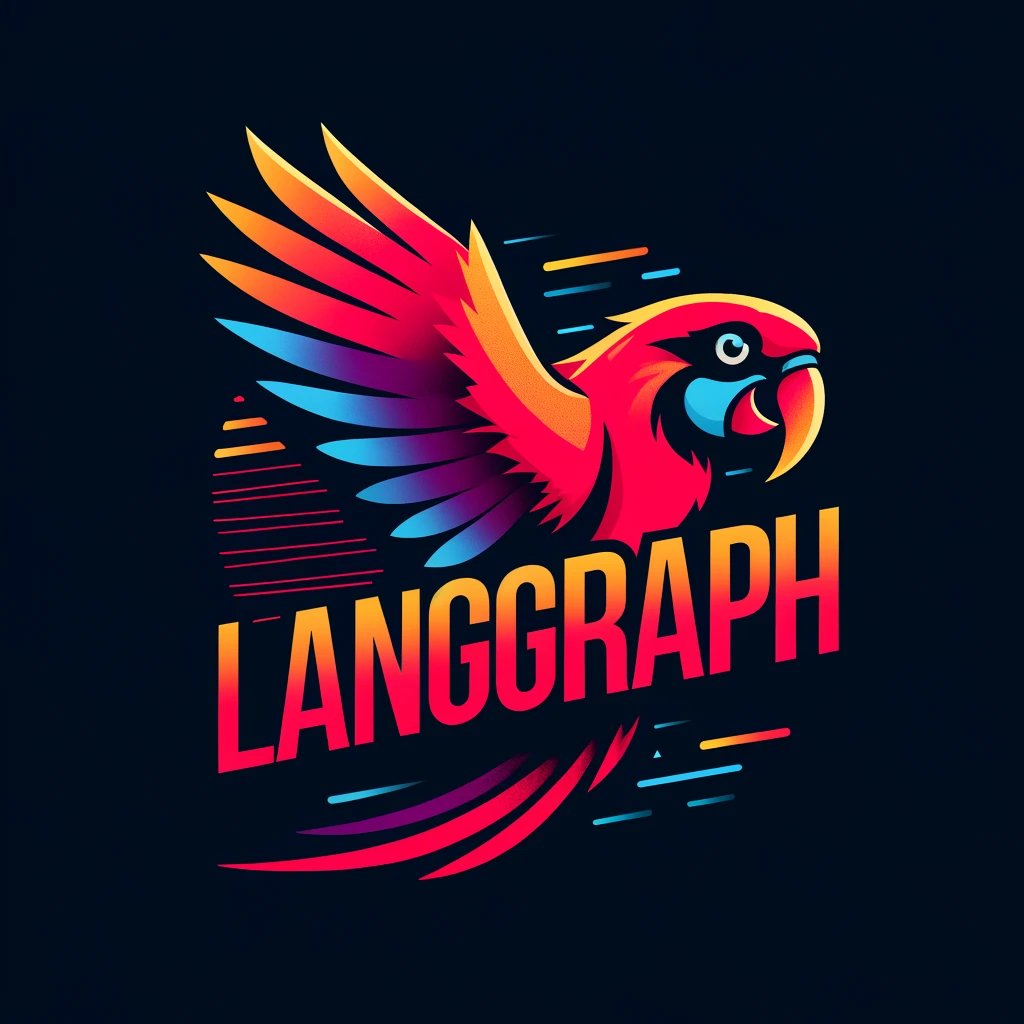

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span> Introduction</div>

# What is LangGraph

LangGraph is a library designed for building stateful, multi-agent applications using large language models (LLMs). It extends the functionality of LangChain by allowing developers to coordinate multiple chains (or actors) across cyclic computational steps, making it suitable for more complex workflows and applications. Here are the main features and concepts behind LangGraph:

### Graph-Based Workflow:

LangGraph enables developers to create workflows as graphs, where each node represents an agent or a specific function, and edges define the transitions between these nodes. This structure supports both directed acyclic graphs (DAGs) and cyclic graphs, allowing for complex, stateful operations​ (LangChain AI)​​ (LangChain Blog)​.

### State Management:

The core component of LangGraph is the StateGraph, which manages a central state object that is updated by the nodes. This state can be modified by adding new information or by overwriting existing attributes, depending on the application needs.

### Multi-Agent Collaboration:

LangGraph supports multi-agent workflows, where each agent can be a specialized LLM or tool. These agents can work independently or collaboratively, sharing information as needed to accomplish tasks more effectively. This design helps in dividing complex problems into manageable units handled by different agents.

### Conditional Routing:

Nodes in a LangGraph can be connected with conditional edges, allowing dynamic decision-making based on the current state. This is useful for applications that require different actions based on user inputs or intermediate results, such as customer support assistants or automated workflows.

### Integration with Tools:

LangGraph easily integrates with various tools and APIs, allowing agents to perform specific actions like web searches, calculations, or database queries. This integration enhances the capabilities of the agents and makes the workflow more robust and versatile.

LangGraph is particularly useful for building applications that need to maintain state across multiple interactions, handle complex decision trees, and integrate seamlessly with external tools and APIs. It is an extension of LangChain, providing a higher level of abstraction for managing complex LLM-based workflows

In [1]:
!pip install langgraph pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.2/310.2 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.3/124.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 7.1 MB/s eta 0:00:00
  Created wheel for pygraphviz: filename=pygraphviz-1.13-cp310-cp310-linux_x86_64.whl size=97929 sha256=d289b5ac74629759d24c5325e35aa61dd6aa3283b9b668630f701c575dfc8d7a
  Stored in directory: /root/.cache/pip/wheels/c5/96/10/6c25add

In [2]:
from langgraph.graph import StateGraph, END
from typing import Dict, TypedDict, Optional, Literal, List, Union

<a id="2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">2 <span style='color:#CDA63A'>|</span> Graph State</div>

Graph state in workflows refers to a structured way of keeping track of the information necessary for the workflow to operate correctly. This state is typically a collection of variables that can be updated and passed between different nodes in the workflow. It is dictionary-like structure that holds the information needed to track the progress and outcomes of a workflow.

In [3]:
class GraphState(TypedDict):
    init_input: Optional[str] = None # The initial input string from the user.
    fruit: Optional[str] = None # The validated fruit name.
    final_result: Optional[str] = None # The final result message.

# Optional 
# is used to indicate that a value can either be of a specified type or be None. 
# It is a way to express that a variable or function return value might not have a value (i.e., it can be None).

### TypedDict
# is a type annotation construct introduced in Python 
# to allow for more precise type checking of dictionaries with a fixed set of keys, 
# each associated with specific value types. This is especially useful when dealing with structured data such as JSON responses from web APIs.

# Purpose: It helps ensure that dictionaries have specific keys with specific types of values.
# Example Use Case: When you receive JSON data from a web API and want to make sure it matches a particular structure.

<a id="3"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">3 <span style='color:#CDA63A'>|</span> Graph nodes (State Functions)</div>

Nodes represent specific points or actions within the workflow. Each node performs a certain operation or check.

In [4]:
# input_fruit: This function processes the initial input to validate if the fruit is in the predefined list. 
# It updates the state with the fruit name or sets an error.
def input_fruit(state: GraphState) -> Dict[str, str]:
    print("Node: input_fruit()")
    init_input = state.get("init_input", "").strip().lower()
    
    if init_input not in ["apple", "banana", "cherry"]:
        return {"fruit": "error"}
    
    return {"fruit": init_input}

# confirm_fruit: This function sets the final result when the fruit selection is confirmed by the user.
def confirm_fruit(state: GraphState) -> Dict[str, str]:
    print("--------------------------")
    print("Node: confirm_fruit()")
    return {"final_result": f"You selected {state['fruit']}, which is a valid fruit."}

# error: This function sets the final result to an error message if there is an error in the input 
# or the user rejects the selection.
def error(state: GraphState) -> Dict[str, str]:
    print("--------------------------")
    print("Node: error()")
    return {"final_result": "error"}


<a id="4"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">4 <span style='color:#CDA63A'>|</span> Functions to Determine Next Node (Edge Functions)</div>


In [5]:
# continue_next: This function determines the next node based on the state after input_fruit. 
# If the fruit is valid, it transitions to review_fruit; otherwise, it transitions to error.

def continue_next(state: GraphState) -> Literal["to_confirm_fruit", "to_error"]:
    print("--------------------------")
    print("Function Edge: continue_next:")
    print(f"Function Edge State: {state}")
    if state.get("fruit") != "error":
        print("Function Edge Continue: to_confirm_fruit")
        return "to_confirm_fruit"
    
    print("Function Edge Continue: to_error")
    return "to_error"

<a id="5"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">5 <span style='color:#CDA63A'>|</span> Workflow Definitions</div>


Set up a graph with all the nodes named and the edges defined. Edges refer to the path that nodes other than the start node need to take, each specified by their respective node name. Additionally, the entry-point specifies the start-node.

In [6]:
workflow = StateGraph(GraphState)

workflow.add_node("input_fruit", input_fruit)
workflow.add_node("confirm_fruit", confirm_fruit)
workflow.add_node("error", error)

workflow.set_entry_point("input_fruit") # It indicates start node.

#Edges define the transitions between nodes. These transitions can be conditional based on the state.
workflow.add_edge("confirm_fruit", END)
workflow.add_edge("error", END)

workflow.add_conditional_edges(
# The add_conditional_edges method is used to add conditional transitions (edges) 
# from one node to other nodes based on the logic defined in a function. 
# In our case, the function is continue_next.
    "input_fruit",  # Starting Node: "input_fruit"
    continue_next,  # Function to Determine Next Node: continue_next
    {    
        "to_confirm_fruit": "confirm_fruit",  # Mapping function output to nodes
        "to_error": "error",
    },
)

### How conditional edge works

1. Starting Node: "input_fruit"

- This is the node from which the conditional transitions originate.

2. Function to Determine Next Node: continue_next

- This function is called with the current state.
- Based on the current state, it returns a string that indicates the next state.

3. Mapping of Function Output to Nodes:

- This dictionary maps the possible outputs of continue_next to specific nodes.
- If continue_next returns "to_confirm_fruit", the workflow transitions to the confirm_fruit node.
- If continue_next returns "to_error", the workflow transitions to the error node.

In [7]:
app = workflow.compile()

<a id="6"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">6 <span style='color:#CDA63A'>|</span> Results</div>

In [8]:
# Test with a valid fruit
result = app.invoke({"init_input": "apple"})
print("--------------------------")
print("Workflow Result:")
print(result)

Node: input_fruit()
--------------------------
Function Edge: continue_next:
Function Edge State: {'init_input': 'apple', 'fruit': 'apple'}
Function Edge Continue: to_confirm_fruit
--------------------------
Node: confirm_fruit()
--------------------------
Workflow Result:
{'init_input': 'apple', 'fruit': 'apple', 'final_result': 'You selected apple, which is a valid fruit.'}


In [9]:
# Test with an invalid fruit
result = app.invoke({"init_input": "mango"})
print("--------------------------")
print("Workflow Result:")
print(result)

Node: input_fruit()
--------------------------
Function Edge: continue_next:
Function Edge State: {'init_input': 'mango', 'fruit': 'error'}
Function Edge Continue: to_error
--------------------------
Node: error()
--------------------------
Workflow Result:
{'init_input': 'mango', 'fruit': 'error', 'final_result': 'error'}


<a id="6.1"></a>
## <b>6.1 <span style='color:#E1B12D'>Displaying</span></b>

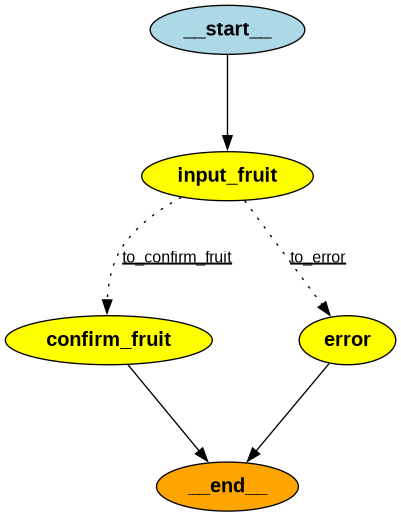

In [10]:
from IPython.display import display, Image

png_data = app.get_graph().draw_png()

# Convert the binary data to an IPython Image object with specific dimensions
image = Image(data=png_data, width=300, height=300)

# Display the image
display(image)

<a id="7"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">7 <span style='color:#CDA63A'>|</span> Additional State Function (Node)</div>

Let's add another function (node) to complicate a little bit.

<a id="7.1"></a>
## <b>7.1 <span style='color:#E1B12D'>Update Graph State</span></b>

In [11]:
class GraphState(TypedDict):
    init_input: Optional[str] = None
    fruit: Optional[str] = None
    final_result: Optional[str] = None
    user_confirmation: Optional[str] = None  # New field for user confirmation

In [12]:
# review_fruit: This function allows the user to review their fruit selection. 
# It doesn't modify the state, but it prints a review message.
def review_fruit(state: GraphState) -> Dict[str, str]:
    print("--------------------------")
    print("Node: review_fruit()")
    print(f"Review your selection: {state['fruit']}. Is this correct?")
    return {}

<a id="7.2"></a>
## <b>7.2 <span style='color:#E1B12D'>Update Functions to Determine Next Node</span></b>

In [13]:
# continue_next: This modified function determines the next node based on the state after input_fruit. 
# If the fruit is valid, it transitions to review_fruit; otherwise, it transitions to error.
def continue_next(state: GraphState) -> Literal["to_review_fruit", "to_error"]:
    print("--------------------------")
    print("Function Edge: continue_next:")
    print(f"Function Edge State: {state}")
    if state.get("fruit") != "error":
        print("Function Edge Continue: to_review_fruit")
        return "to_review_fruit"
    
    print("Function Edge Continue: continue to_error")
    return "to_error"

#review_decision: This function determines the next node based on the user's confirmation after reviewing the fruit. 
# If the user confirms, it transitions to confirm_fruit; otherwise, it transitions to error.
def review_decision(state: GraphState) -> Literal["to_confirm_fruit", "to_error"]:
    print("--------------------------")
    print("Function Edge: review_decision:")
    print(f"Function Edge Continue: state: {state}")
    if state.get("user_confirmation") == "yes":
        print("Function Edge Continue: to_confirm_fruit")
        return "to_confirm_fruit"
    
    print("Function Edge Continue: to_error")
    return "to_error"

<a id="7.3"></a>
## <b>7.3 <span style='color:#E1B12D'>Update Workflow Definition</span></b>

In [14]:
workflow = StateGraph(GraphState)

workflow.add_node("input_fruit", input_fruit)
workflow.add_node("review_fruit", review_fruit)
workflow.add_node("confirm_fruit", confirm_fruit)
workflow.add_node("error", error)

workflow.set_entry_point("input_fruit")
workflow.add_edge("confirm_fruit", END)
workflow.add_edge("error", END)

workflow.add_conditional_edges(
    "input_fruit",  # The node where the decision is made
    continue_next,  # The function that makes the decision
    {    
        "to_review_fruit": "review_fruit",  # Mapping function output to nodes
        "to_error": "error",
    },
)

workflow.add_conditional_edges(
    "review_fruit",  # The node where the decision is made after review
    review_decision,  # The function that makes the decision after review
    {    
        "to_confirm_fruit": "confirm_fruit",  # Mapping function output to nodes
        "to_error": "error",
    },
)

In [15]:
app = workflow.compile()

<a id="7.4"></a>
## <b>7.4 <span style='color:#E1B12D'>Results</span></b>

In [16]:
# Test with a valid fruit and user confirmation
result = app.invoke({"init_input": "apple", "user_confirmation": "yes"})
print("Result:")
print(result)

Node: input_fruit()
--------------------------
Function Edge: continue_next:
Function Edge State: {'init_input': 'apple', 'fruit': 'apple', 'user_confirmation': 'yes'}
Function Edge Continue: to_review_fruit
--------------------------
Node: review_fruit()
Review your selection: apple. Is this correct?
--------------------------
Function Edge: review_decision:
Function Edge Continue: state: {'init_input': 'apple', 'fruit': 'apple', 'user_confirmation': 'yes'}
Function Edge Continue: to_confirm_fruit
--------------------------
Node: confirm_fruit()
Result:
{'init_input': 'apple', 'fruit': 'apple', 'final_result': 'You selected apple, which is a valid fruit.', 'user_confirmation': 'yes'}


In [17]:
# Test with a valid fruit and user rejection (simulate error for simplicity)
result = app.invoke({"init_input": "apple", "user_confirmation": "no"})
print("Result:")
print(result)

Node: input_fruit()
--------------------------
Function Edge: continue_next:
Function Edge State: {'init_input': 'apple', 'fruit': 'apple', 'user_confirmation': 'no'}
Function Edge Continue: to_review_fruit
--------------------------
Node: review_fruit()
Review your selection: apple. Is this correct?
--------------------------
Function Edge: review_decision:
Function Edge Continue: state: {'init_input': 'apple', 'fruit': 'apple', 'user_confirmation': 'no'}
Function Edge Continue: to_error
--------------------------
Node: error()
Result:
{'init_input': 'apple', 'fruit': 'apple', 'final_result': 'error', 'user_confirmation': 'no'}


In [18]:
# Test with an invalid fruit
result = app.invoke({"init_input": "mango"})
print("Result:")
print(result)

Node: input_fruit()
--------------------------
Function Edge: continue_next:
Function Edge State: {'init_input': 'mango', 'fruit': 'error'}
Function Edge Continue: continue to_error
--------------------------
Node: error()
Result:
{'init_input': 'mango', 'fruit': 'error', 'final_result': 'error'}


<a id="7.5"></a>
## <b>7.5 <span style='color:#E1B12D'>Displaying</span></b>

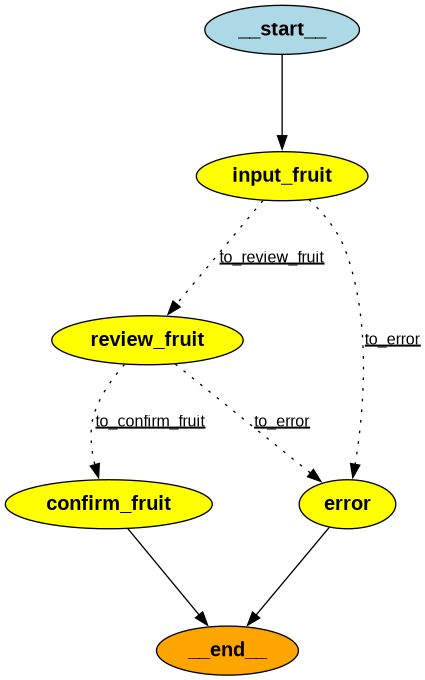

In [19]:
png_data = app.get_graph().draw_png()

# Convert the binary data to an IPython Image object with specific dimensions
image = Image(data=png_data, width=300, height=300)

# Display the image
display(image)

<a id="8"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:150%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">8 <span style='color:#CDA63A'>|</span> Collection of my notebooks for your enjoyment</div>

Stop Prompting & Start Programming: DSPy
* [Stop Prompting & Start Programming: DSPy Examples](https://www.kaggle.com/code/marcinrutecki/stop-prompting-start-programming-dspy-examples)
* [Stop Prompting & Start Programming: DSPy Signatures](https://www.kaggle.com/code/marcinrutecki/stop-prompting-start-programming-dspy-signature)

AI Search Engines:
* [AI Crew Streamlines Next-Gen Research Process](https://www.kaggle.com/code/marcinrutecki/ai-crew-streamlines-next-gen-research-process)
* [LLM Enhanced Web Search: The Tavily & Lang Chain](https://www.kaggle.com/code/marcinrutecki/llm-enhanced-web-search-the-tavily-lang-chain)

LangChain
* [LangChain: Multiple chains simply Explained](https://www.kaggle.com/code/marcinrutecki/langchain-multiple-chains-simply-explained)

Image Generation
* [Face Image Enhance Upscale With GFPGAN Explained](https://www.kaggle.com/code/marcinrutecki/face-image-enhance-upscale-with-gfpgan-explained)
* [Stable Diffusion XL Hugging Face API Explained](https://www.kaggle.com/code/marcinrutecki/stable-diffusion-xl-hugging-face-api-explained)

ML Principles
* [One Hot Encoding - everything you need to know](https://www.kaggle.com/code/marcinrutecki/one-hot-encoding-everything-you-need-to-know)
* [Stacking classifier - ensemble for great results](https://www.kaggle.com/code/marcinrutecki/stacking-classifier-ensemble-for-great-results)
* [How to create a meaningful EDA](https://www.kaggle.com/code/marcinrutecki/how-to-create-a-meaningful-eda)
* [GridSearchCV + KFold CV: The Right Way](https://www.kaggle.com/code/marcinrutecki/gridsearchcv-kfold-cv-the-right-way)
* [Voting Classifier for Better Results](https://www.kaggle.com/code/marcinrutecki/voting-classifier-for-better-results)
* [SMOTE and Tomek Links for imbalanced data](https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data)
* [Best techniques and metrics for Imbalanced Dataset](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset)
* [Regression Models Evaluation Metrics](https://www.kaggle.com/code/marcinrutecki/regression-models-evaluation-metrics)
* [Clustering methods - comprehensive study](https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study)
* [Outlier detection methods!](https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods)
* [Multicollinearity - detection and remedies](https://www.kaggle.com/code/marcinrutecki/multicollinearity-detection-and-remedies)
* [Standardize or Normalize - Ultimate Answer](https://www.kaggle.com/code/marcinrutecki/standardize-or-normalize-ultimate-answer)